In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [62]:
img = cv2.imread("80457700.jpg")
img.shape

(4058, 7300, 3)

In [3]:
# Normally, we used to work with an image of constant size. But on some occasions, we need to work with (the same) images in different resolution. For example, while searching for something in an image, like face, we are not sure at what size the object will be present in said image. In that case, we will need to create a set of the same image with different resolutions and search for object in all of them. These set of images with different resolutions are called Image Pyramids (because when they are kept in a stack with the highest resolution image at the bottom and the lowest resolution image at top, it looks like a pyramid).



In [4]:
# There are two kinds of Image Pyramids. 1) Gaussian Pyramid and 2) Laplacian Pyramids

# Higher level (Low resolution) in a Gaussian Pyramid is formed by removing consecutive rows and columns in Lower level (higher resolution) image. Then each pixel in higher level is formed by the contribution from 5 pixels in underlying level with gaussian weights. By doing so, a M×N image becomes M/2×N/2 image. So area reduces to one-fourth of original area. It is called an Octave. The same pattern continues as we go upper in pyramid (ie, resolution decreases). Similarly while expanding, area becomes 4 times in each level. We can find Gaussian pyramids using cv.pyrDown() and cv.pyrUp() functions.

In [63]:
newimg = cv2.pyrDown(img)
newimg.shape

(2029, 3650, 3)

In [64]:
## M/2 X N/2

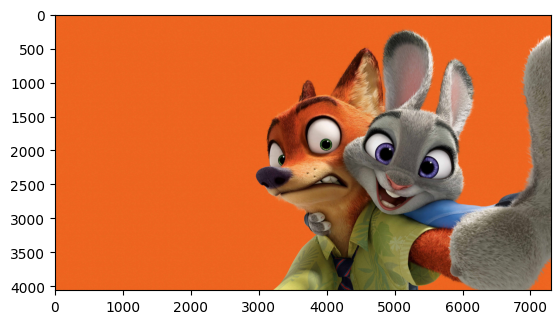

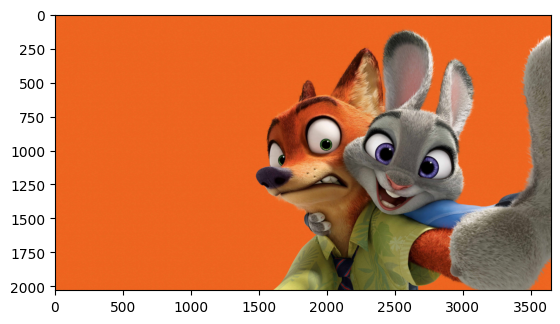

In [65]:
downimg = [img,newimg]
for i in downimg:
    plt.imshow(i[:,:,::-1],cmap="gray")
    plt.show()

In [66]:
for i in range(3):
    img = downimg[len(downimg)-1]
    newim = cv2.pyrDown(img)
    downimg.append(newim)
    

In [67]:
len(downimg)

5

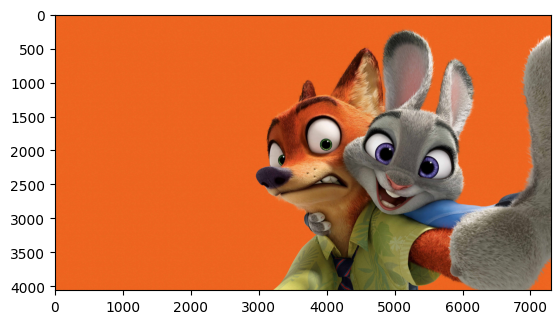

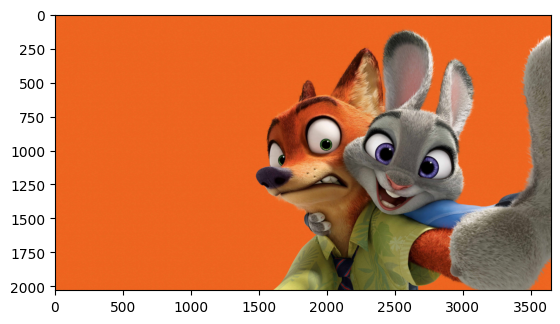

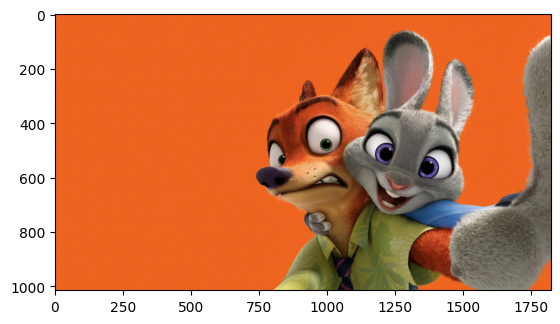

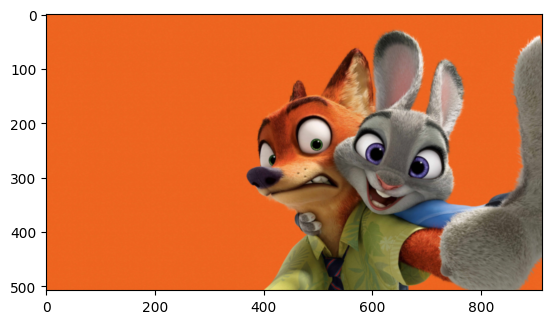

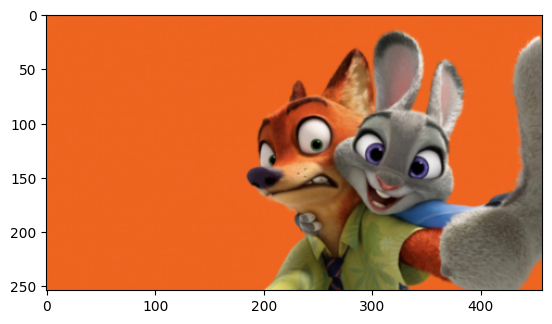

In [68]:
for i in downimg:
    plt.imshow(i[:,:,::-1],cmap="gray")
    plt.show()

In [83]:
finalim = downimg[-1]
finalim

array([[[ 34, 103, 238],
        [ 33, 102, 239],
        [ 33, 101, 240],
        ...,
        [ 32, 102, 236],
        [ 34, 102, 239],
        [ 34, 102, 240]],

       [[ 34, 103, 238],
        [ 33, 102, 238],
        [ 33, 101, 239],
        ...,
        [ 32, 101, 237],
        [ 33, 101, 239],
        [ 33, 101, 239]],

       [[ 34, 103, 238],
        [ 33, 102, 237],
        [ 32, 101, 237],
        ...,
        [ 32, 101, 238],
        [ 32, 101, 238],
        [ 33, 101, 239]],

       ...,

       [[ 34, 103, 238],
        [ 33, 102, 238],
        [ 32, 101, 238],
        ...,
        [ 33, 103, 238],
        [ 33, 102, 238],
        [ 32, 101, 238]],

       [[ 34, 103, 237],
        [ 33, 103, 237],
        [ 32, 101, 238],
        ...,
        [ 34, 102, 239],
        [ 33, 102, 239],
        [ 33, 102, 238]],

       [[ 34, 103, 238],
        [ 34, 103, 238],
        [ 33, 102, 238],
        ...,
        [ 34, 103, 239],
        [ 34, 103, 239],
        [ 33, 103, 237]]

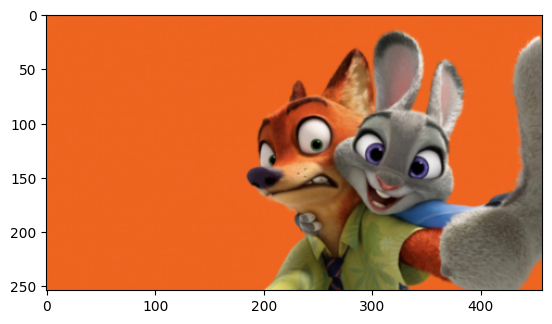

In [84]:
plt.imshow(finalim[:,:,::-1])

In [85]:
finalim = cv2.cvtColor(finalim,cv2.COLOR_BGR2GRAY)

In [90]:
thres, thresholdImg = cv2.threshold(finalim,100,255,cv2.THRESH_BINARY)
thres,thresholdImg

(100.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [91]:
window = "my Img"
cv2.namedWindow(window,cv2.WINDOW_NORMAL)
cv2.imshow(window,thresholdImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

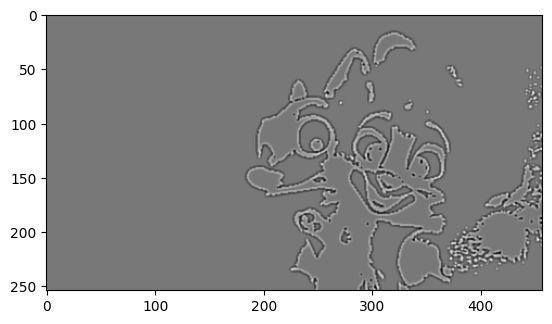

In [92]:
laplacianImg = cv2.Laplacian(thresholdImg,cv2.CV_64F,ksize=5)
plt.imshow(laplacianImg,cmap="gray")

In [104]:
window = "my Img"
cv2.namedWindow(window,cv2.WINDOW_NORMAL)
cv2.imshow(window,laplacianImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [97]:
finalim.shape

(254, 457)

In [99]:
finalim = np.uint8(finalim)

In [145]:
threshImg = cv2.adaptiveThreshold(finalim,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

In [146]:
threshImg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [147]:
threshImg.shape

(254, 457)

In [149]:
window = "my Img"
cv2.namedWindow(window,cv2.WINDOW_NORMAL)
cv2.imshow(window,threshImg)
cv2.waitKey(0)
cv2.destroyAllWindows()